# line plot with multifacets

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nukta = sns.load_dataset("dots")
nukta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


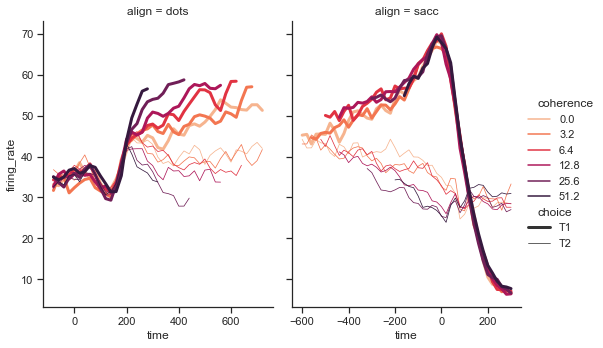

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Kashti = sns.load_dataset("titanic")

sns.set_theme(style="ticks")
# defining a color pelette

p=sns.color_palette('rocket_r')

# plot lineplot

sns.relplot(data=nukta,x="time",y="firing_rate",hue="coherence",size="choice",col="align",kind="line",size_order=["T1","T2"],
           palette=p,height=5,aspect=.75,facet_kws=dict(sharex=False),)

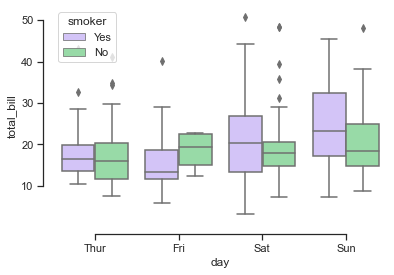

In [3]:
import seaborn as sns
sns.set_theme(style="ticks",palette="pastel")

#load the example tips dataset
tips = sns.load_dataset("tips")

#Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",hue="smoker",palette=["m","g"],data= tips)
sns.despine(offset= 10, trim=True)

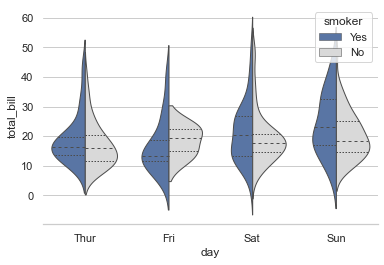

In [4]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#load the e xample tips dataset
tips= sns.load_dataset("tips")

#draw a nested violinplot and split the violin for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True, inner="quart",
               linewidth=1,palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [5]:
heeray = sns.load_dataset("diamonds")
heeray.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='carat', ylabel='price'>

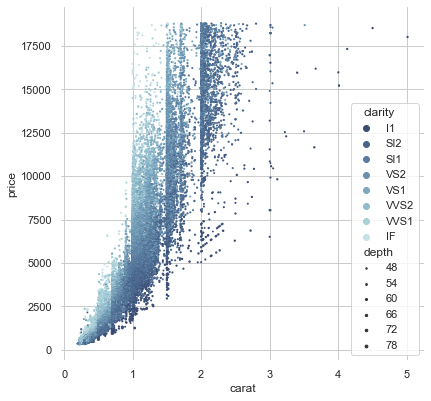

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

#load the example diamonds dataset
diamonds=sns.load_dataset("diamonds")

#Draw a scatterplot while asigning point colors and sizes to different variable im the dataset
f,ax = plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking= ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price", hue="clarity",size="depth", palette="ch:r=-.2,d=.3_r", hue_order=clarity_ranking,
               sizes=(1, 8), linewidth=0, data=diamonds, ax=ax)

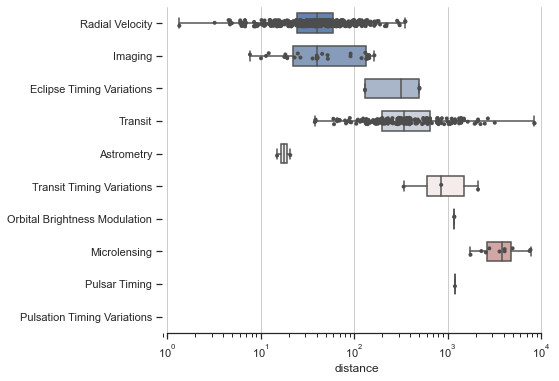

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

#Initialize the figure with a logarithmic x axis
f,ax = plt.subplots(figsize=(7,6))
ax.set_xscale("log")

#load the example planets dataset
planets = sns.load_dataset("planets")

#plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method",data=planets,whis=[0,100], width=.6, palette="vlag")

#add in points to show each observation
sns.stripplot(x="distance",y="method", data=planets,size=4, color=".3",linewidth=0)

#tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True,left=True)

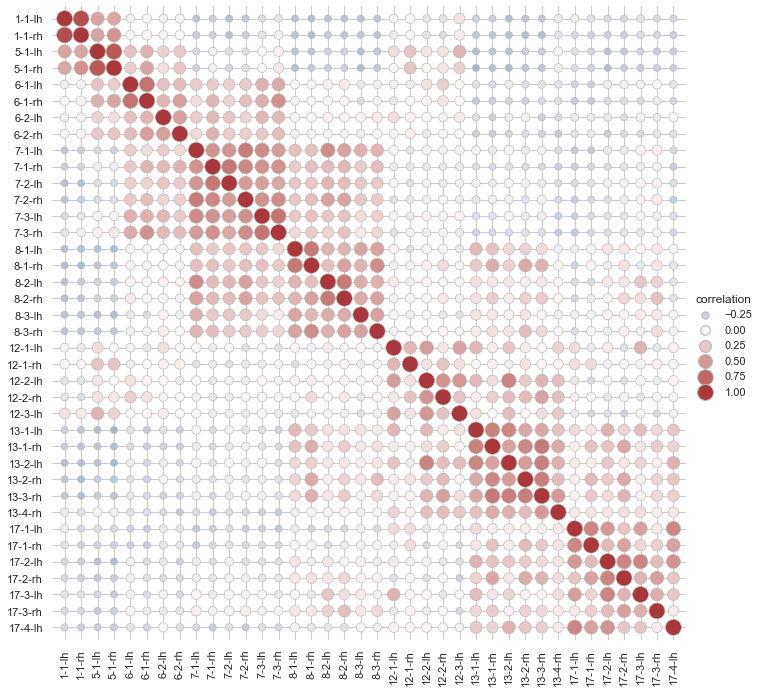

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")

#load the brain networks dataset, select subset,and collapse the multi-index
df= sns.load_dataset("brain_networks", header=[0,1,2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns= df.columns.map("-".join)

#compute a correlation matrix and convert to long-form
corr_mat =df.corr().stack().reset_index(name="correlation")

#draw each ceil as a scatter point with verifying size and color

g = sns.relplot(data=corr_mat,
x="level_0", y="level_1",hue= "correlation", size="correlation",
palette="vlag", hue_norm=(-1,1),edgecolor=".7",
height=10,sizes=(50, 250),size_norm=(-.2, .8),)


#tweak the figure to final size
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

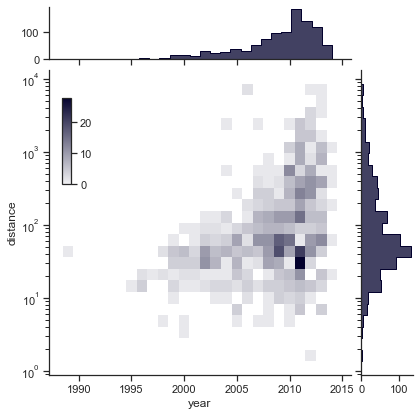

In [9]:
import seaborn as sns
sns.set_theme(style="ticks")

#load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data= planets,x="year", y="distance", marginal_ticks= True)

#set a log scaling  on the y axis
g.ax_joint.set(yscale="log")

#create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02,.2])

#add the joint and marginal histogram plots
g.plot_joint(
sns.histplot,discrete=(True,False), cmap="light:#03012d", pmax= 8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

<AxesSubplot:xlabel='clarity', ylabel='carat'>

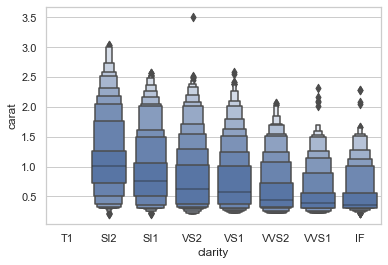

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

diamonds= sns.load_dataset("diamonds")
clarity_ranking = ["T1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

sns.boxenplot(x="clarity", y="carat", color="b", order=clarity_ranking, scale="linear", data=diamonds)

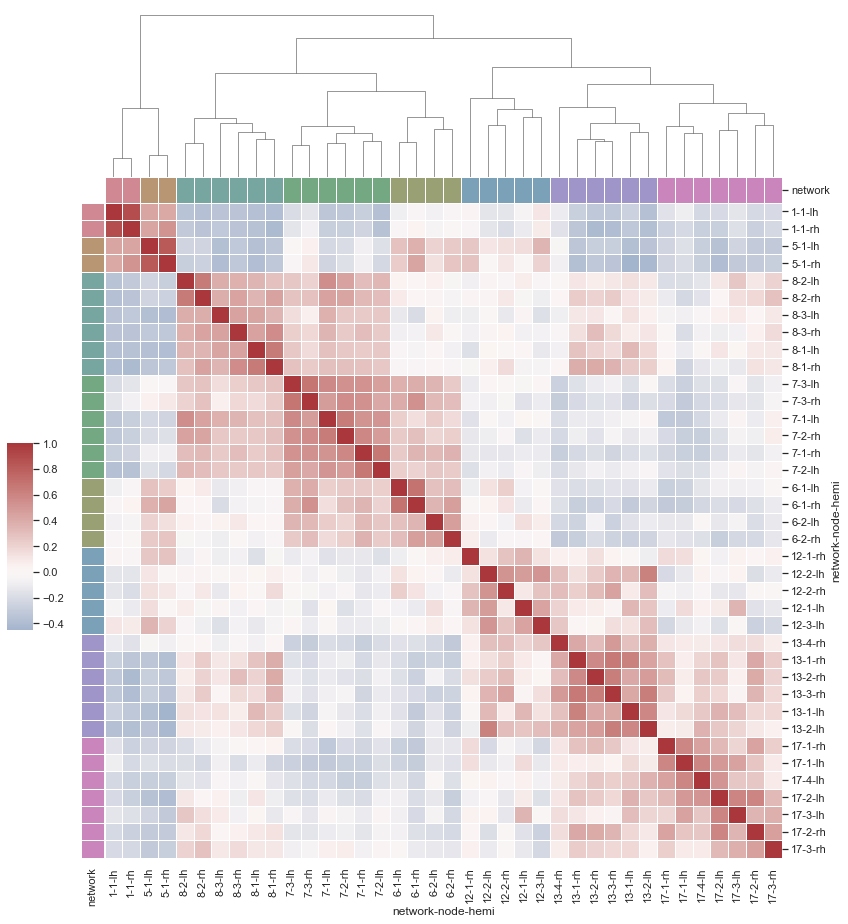

In [11]:
import pandas as pd
import seaborn as sns
sns.set_theme()

#load the brain networks exampledataset
df= sns.load_dataset("brain_networks", header=[0,1,2], index_col=0)

# select asubset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

#create a catergorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str,used_networks),network_pal))

#conert the palettebto vectors that will be drawn on the side of matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index= df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

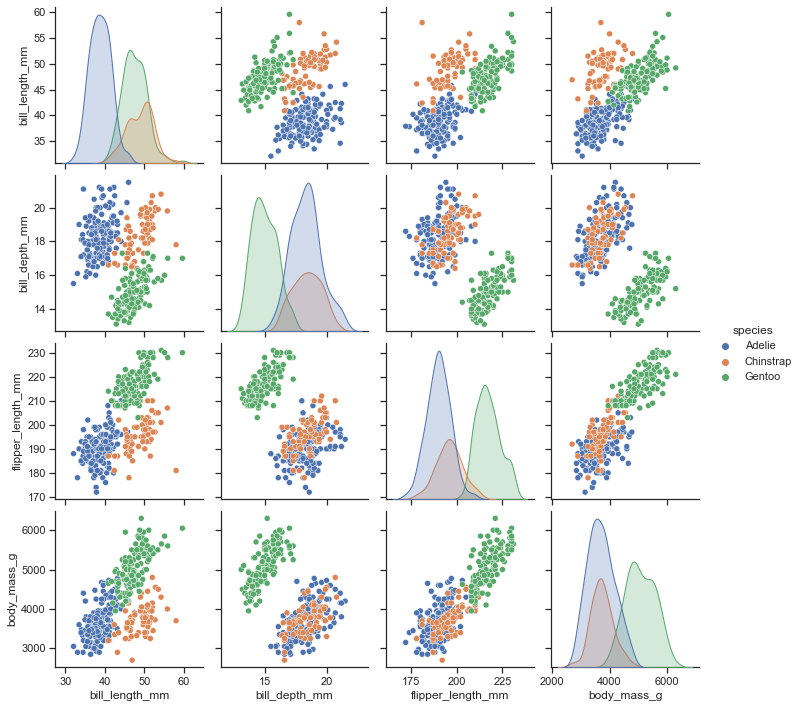

In [12]:
#pairplot
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot:>

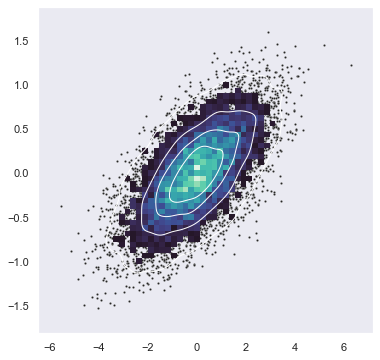

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

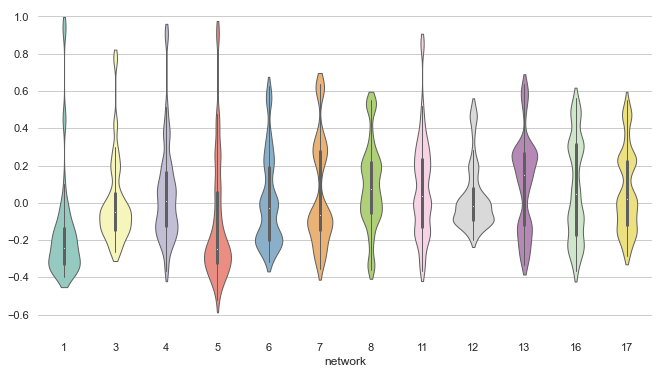

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)